In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
def random_direction(shape):
    return np.random.binomial(1, 0.5, size=shape) * 2 - 1

<IPython.core.display.Javascript object>


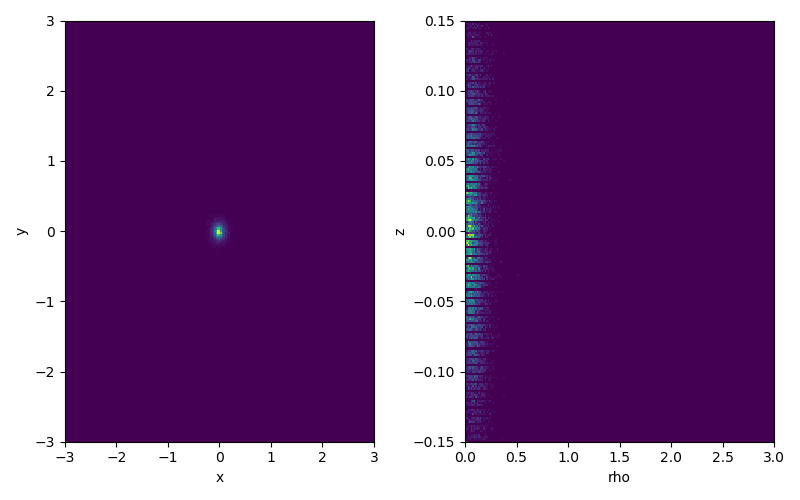

In [8]:
particles = [np.zeros(3)]
rho_max   = 3
z_max     = 0.15
n_steps   = 1000
xybins    = np.linspace(-rho_max, rho_max, 201)
zbins     = np.linspace(-  z_max,   z_max, 201)
rhobins   = np.linspace(       0, rho_max, 201)
step_size = np.array([1e-3, 1e-3, 1e-3])

figure = plt.figure(figsize=(8, 5))
left   = figure.add_subplot(121)
right  = figure.add_subplot(122)

plt.ion()
figure.show()
figure.canvas.draw()

while True:
    try:
        particles  = np.concatenate([particles, np.zeros((n_steps, 3))], axis=0)
        shape      = tuple((n_steps, *particles.shape))
        particles += np.sum(random_direction(shape) * step_size, axis=0)
        x, y, z    = particles.T
        rho        = np.sqrt(x**2 + y**2)
        outside    = (rho > rho_max) | (np.abs(z) > z_max)
        particles  = particles[~outside]
        x, y, z    = particles.T
        rho        = np.sqrt(x**2 + y**2)

        left.clear()
        h2 = left.hist2d(x, y, (xybins, xybins))
        left.set_xlabel("x")
        left.set_ylabel("y")

        right.clear()
        h2 = right.hist2d(rho, z, (rhobins, zbins))
        right.set_xlabel("rho")
        right.set_ylabel("z")

        figure.canvas.draw()
        figure.tight_layout()
    except KeyboardInterrupt:
        break

Equation:
$$ \frac{dN}{dt} = D\ \nabla^2 N + Q - \frac{N}{\tau}\qquad \Rightarrow \qquad N_t = D N_{xx} + Q - N/\tau$$

Definitions:
$i$ = spatial index
$t$ = temporal index

Discretization:
$$\frac{N_i^{t+1} - N_i^t}{\Delta t} = D \frac{N_{i+1}^t - 2 N_i^t + N_{i-1}^t}{\Delta x^2} + Q - N_i^t \Delta t / \tau$$

$$N_i^{t+1} = N_i^t + \Delta t \cdot \left( D \frac{N_{i+1}^t - 2 N_i^t + N_{i-1}^t}{\Delta x^2} + Q \right)$$

Defining $\alpha = \frac{D \Delta t}{\Delta x^2}$:

$$N_i^{t+1} = \alpha N_{i+1}^t + (1 - 2 \alpha) N_i^t + \alpha N_{i-1}^t + Q \Delta t$$


Boundary conditions:
$$t = 0 \qquad \Rightarrow \qquad N = 0 \forall x$$
$$x = R \qquad \Rightarrow \qquad N = 0 \forall t$$

In [14]:
R  = 10
T  = .5
Q  = 1
D  = 1e-1
dx = 1e-1
dt = 1e-2
nx = int(R / dx) + 1
nt = int(T / dt) + 1

alpha = D * dt / dx**2
beta  = 1 - 2 * alpha
N = np.zeros((nt, nx))

for t in range(nt - 1):
    for i in range(1, nx - 1):
        N[t+1, i] = alpha * N[t, i+1] + beta * N[t, i] + N[t, i-1] + Q * int(i == 1) * dt

<IPython.core.display.Javascript object>


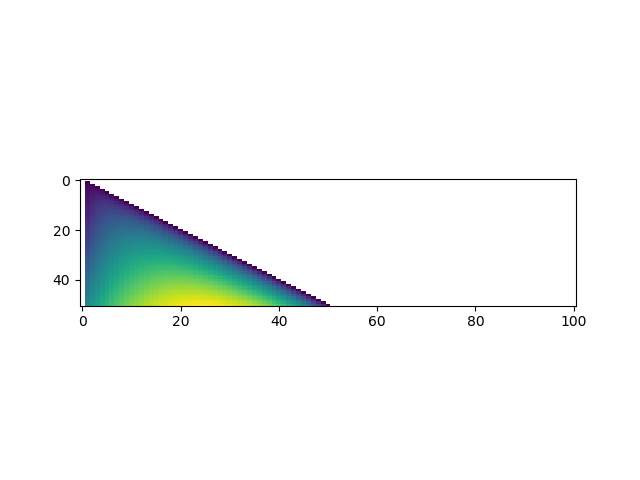

In [20]:
import matplotlib as mpl
plt.imshow(N, norm=mpl.colors.LogNorm())
plt.gca().set_aspect(nt/nx)